In [3]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Define el alcance y carga tus credenciales
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

# Autenticación con gspread
client = gspread.authorize(creds)

# Abrir la hoja de cálculo por nombre
sheet = client.open("ventas_productos_tecnologicos").sheet1

# Convertir los datos en un DataFrame de Pandas
dataframe = pd.DataFrame(sheet.get_all_records())

# Mostrar los primeros registros para verificar
dataframe.head()


,Fecha de Venta,Producto,Cantidad Vendida,Precio Unitario
0,2021-01-05 8:02:44,Mouse,7,300.16
1,2021-01-07 14:33:30,Tablet,5,809.24
2,2021-01-08 0:32:25,Mouse,3,254.73
3,2021-01-23 6:29:09,Monitor,6,110.76
4,2021-01-26 15:18:24,Teclado,6,73.44


In [7]:
dataframe['Total de Ventas'] = dataframe['Cantidad Vendida'] * dataframe['Precio Unitario']
ventas_por_producto = dataframe.groupby('Producto')['Total de Ventas'].sum()
ventas=dataframe['Total de Ventas'].sum()
print(ventas_por_producto)
print(f'total ventas: {ventas}')

Producto
Laptop        29012.28
Monitor       51243.89
Mouse         31730.53
Smartphone    61476.02
Tablet        75196.88
Teclado       44663.71
Name: Total de Ventas, dtype: float64
total ventas: 293323.30999999994


In [13]:
# 1. Sumar la cantidad vendida para cada producto
cantidad_vendida_por_producto = dataframe.groupby('Producto')['Cantidad Vendida'].sum()
print(cantidad_vendida_por_producto)
# 2. Encontrar el producto más vendido en términos de cantidad
producto_mas_vendido = cantidad_vendida_por_producto.idxmax()
print(producto_mas_vendido)

# 3. Sumar los ingresos totales para cada producto
ingresos_por_producto = dataframe.groupby('Producto')['Total de Ventas'].sum()
print(ingresos_por_producto)

# 4. Encontrar el producto más rentable en términos de ingresos totales
producto_mas_rentable = ingresos_por_producto.idxmax()
print(producto_mas_rentable)

print(f"Producto más vendido en términos de cantidad: {producto_mas_vendido}")
print(f"Producto más rentable en términos de ingresos totales: {producto_mas_rentable}")

Producto
Laptop         55
Monitor       110
Mouse          78
Smartphone     95
Tablet        112
Teclado        81
Name: Cantidad Vendida, dtype: int64
Tablet
Producto
Laptop        29012.28
Monitor       51243.89
Mouse         31730.53
Smartphone    61476.02
Tablet        75196.88
Teclado       44663.71
Name: Total de Ventas, dtype: float64
Tablet
Producto más vendido en términos de cantidad: Tablet
Producto más rentable en términos de ingresos totales: Tablet


In [21]:
# Convertir 'Fecha de Venta' a datetime si aún no lo está
dataframe['Fecha de Venta'] = pd.to_datetime(dataframe['Fecha de Venta'])
# Extraer mes y año
dataframe['Mes'] = dataframe['Fecha de Venta'].dt.month
dataframe['Año'] = dataframe['Fecha de Venta'].dt.year

# Agrupar por mes y año y sumar las ventas totales
ventas_mensuales = dataframe.groupby(['Año', 'Mes'])['Total de Ventas'].sum()

print(dataframe)

        Fecha de Venta Producto  Cantidad Vendida  Precio Unitario  \
0  2021-01-05 08:02:44    Mouse                 7           300.16   
1  2021-01-07 14:33:30   Tablet                 5           809.24   
2  2021-01-08 00:32:25    Mouse                 3           254.73   
3  2021-01-23 06:29:09  Monitor                 6           110.76   
4  2021-01-26 15:18:24  Teclado                 6            73.44   
..                 ...      ...               ...              ...   
95 2021-12-19 12:41:55  Monitor                 4           731.02   
96 2021-12-20 08:47:28  Monitor                 4           187.61   
97 2021-12-23 08:51:11  Monitor                 3           777.06   
98 2021-12-23 16:36:58  Monitor                 8           142.95   
99 2021-12-27 18:36:30  Teclado                 5           522.52   

    Total de Ventas  Mes   Año  
0           2101.12    1  2021  
1           4046.20    1  2021  
2            764.19    1  2021  
3            664.56    1  2

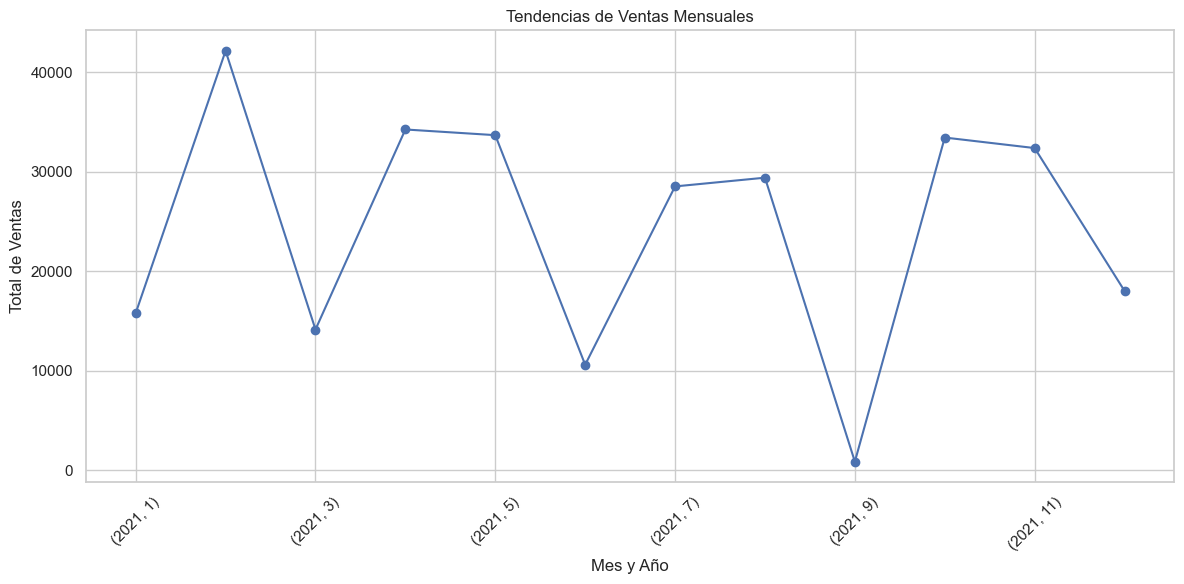

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que ya has preparado el DataFrame 'ventas_mensuales' como se mostró anteriormente

# Configuración para gráficos más bonitos con seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='line', marker='o')

# Etiquetas y título
plt.title('Tendencias de Ventas Mensuales')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [23]:
from gspread_dataframe import set_with_dataframe
# Abrir la hoja de cálculo existente
spreadsheet = client.open("ventas_productos_tecnologicos")
# Crear una nueva hoja o acceder a una existente
try:
    worksheet = spreadsheet.add_worksheet(title="Ventas2021-2022", rows="1000", cols="20")
except:
    worksheet = spreadsheet.worksheet("Ventas2021-2022")

# Escribe el DataFrame en la nueva hoja
set_with_dataframe(worksheet, dataframe)
